In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load noisy data
df = pd.read_csv('/content/drive/MyDrive/KaggleData/train_dirty.csv')
df['date'] = pd.to_datetime(df['date'])

df.head()


,date,store,item,sales,sales_noisy,store_noisy,item_noisy
0,2013-01-01,1,1,13,29.243454,1,1
1,2013-01-02,1,1,11,4.882436,1,1
2,2013-01-03,1,1,14,8.718282,1,1
3,2013-01-04,1,1,13,2.270314,1,1
4,2013-01-05,1,1,10,18.654076,1,4


               sales    sales_noisy
count  913000.000000  913000.000000
mean       52.250287      52.620130
std        28.801144      33.480465
min         0.000000       0.000000
25%        30.000000      29.442119
50%        47.000000      47.594902
75%        70.000000      70.791925
max       231.000000    1793.603436


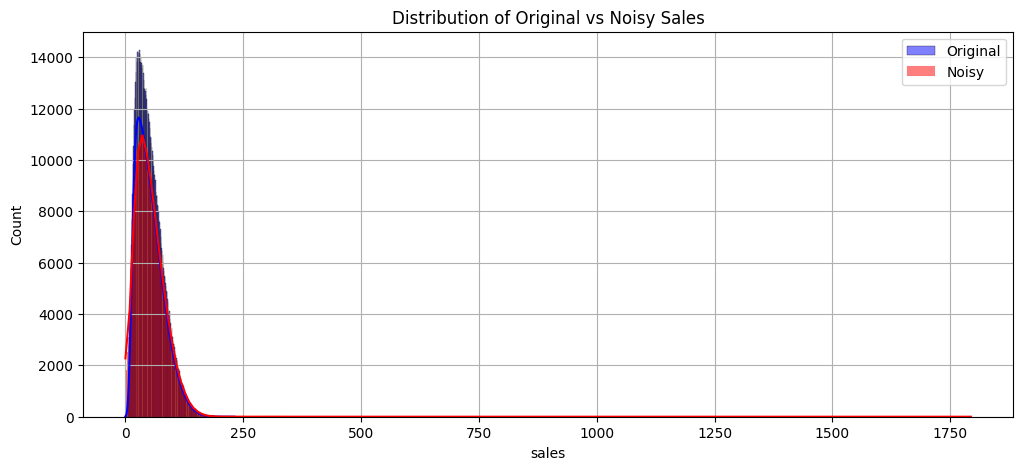

In [3]:
# Summary stats
print(df[['sales', 'sales_noisy']].describe())

# Visual comparison
plt.figure(figsize=(12, 5))
sns.histplot(df['sales'], color='blue', label='Original', kde=True)
sns.histplot(df['sales_noisy'], color='red', label='Noisy', kde=True)
plt.title('Distribution of Original vs Noisy Sales')
plt.legend()
plt.grid()
plt.show()


🚨 Outliers detected: 13071 rows


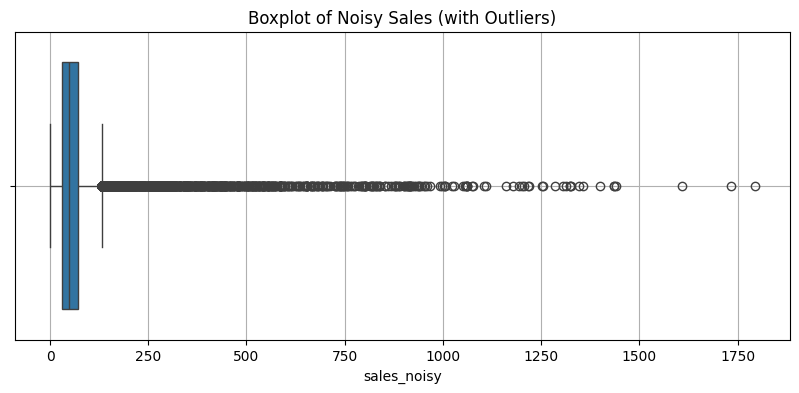

In [4]:
Q1 = df['sales_noisy'].quantile(0.25)
Q3 = df['sales_noisy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['sales_noisy'] < lower_bound) | (df['sales_noisy'] > upper_bound)
print(f"🚨 Outliers detected: {outliers.sum()} rows")

# Plot with outlier range
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['sales_noisy'])
plt.title("Boxplot of Noisy Sales (with Outliers)")
plt.grid()
plt.show()


In [5]:
# Replace outliers with median
sales_median = df['sales_noisy'].median()
df['sales_clean'] = df['sales_noisy'].apply(lambda x: sales_median if x < lower_bound or x > upper_bound else x)

# Round and fix store/item noise
df['store_clean'] = df['store_noisy'].round().clip(1, 10)
df['item_clean'] = df['item_noisy'].round().clip(1, 50)


In [6]:
cleaned = df[['date', 'store_clean', 'item_clean', 'sales_clean']]
cleaned.columns = ['date', 'store', 'item', 'sales']
cleaned.to_csv('/content/drive/MyDrive/KaggleData/train_clean_from_dirty.csv', index=False)
print("✅ Cleaned data saved as train_clean_from_dirty.csv")


✅ Cleaned data saved as train_clean_from_dirty.csv
